# MOBY PROJECT 
### Bulmaca kelimelerinden oluşan bir liste ile çeşitli denemeler.

In [125]:
using Plots,Statistics;
#using Pkg; Pkg.add("DataStructures");

kelime_n = Any[85, 908, 3686, 8258, 14374, 21727, 26447, 16658, 9199, 5296, 3166, 1960, 1023, 557, 261, 132, 48, 16, 5, 3]


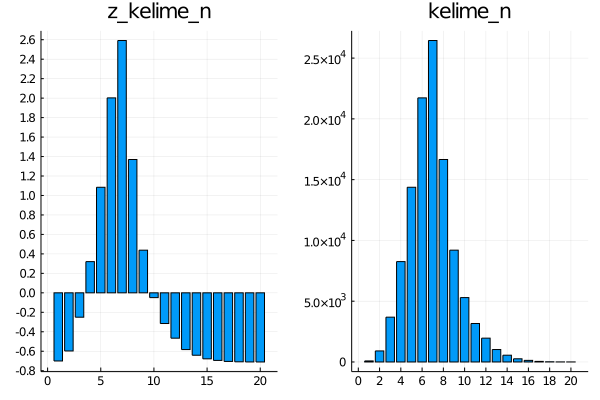

In [76]:
# n karakterli kelimeleri al
function n_karakter(n::Int64)
    sayac=0
    for kelime in eachline("../data/words.txt")
        if(length(kelime)==n)
            sayac+=1
        end
    end
    return sayac
end

kelime_n=[]
for i in 2:21
    push!(kelime_n,n_karakter(i))
end
z_kelime_n=(kelime_n.-mean(kelime_n))/std(kelime_n)
p1=bar(z_kelime_n,yticks=-1:0.2:3,title="z_kelime_n")
p2=bar(kelime_n,xticks=0:2:21,title="kelime_n")
@show kelime_n
plot(p1,p2,legend=false)


In [1]:
# içinde e olmayan kelimeler
function e_harfi_var_mi(kelime::AbstractString)::Bool
    return 'e' in kelime #occursin('e',kelime)
end
sayac=0
kelimesayac=0
for kelime in eachline("../data/words.txt")
    kelimesayac+=1
    if(!e_harfi_var_mi(kelime))
        sayac=+1
    end
end
print((sayac/kelimesayac)*100) # e harfi olmayanların yüzdesi


0.0008786651319315697

In [ ]:
# verilen harflerden birini içermeyen kelimeler
function bulundurmaz(kelime,harfler)
     for yasak in harfler
        if yasak in kelime
            return false
        end
    end
    return true
end
bulundurmaz("abc","fds")

### Soru 
Kelimelerden en çoğunu döndüren 5 yasak harfi bulun.  
(Kelimelerde en az kullanılan ilk 5 harf nelerdir?)  

Bunun için bir barplot çizdirebliriz aslında.  
Bir değişkene ingiliz alfabesini atar ve metinde geçen bütün kelimelerde olan harfleri sayabiliriz.  
Her kelime için bir alfabe vektörü oluşturulur. (geçen harfler 1 geçmeyenler 0)

n => 0.8837277601751957
p => -0.3063249838759039
a => 1.1602666264275954
y => -0.7284160331713002
l => 0.4209903984029936
b => -0.580190652511785
e => 2.468625500891793
q => -1.1342279944173856
s => 1.7759588723346915
g => -0.23575942115268034
z => -1.061640397599616
x => -1.0976257501296718
d => -0.00600151318935319
i => 1.4628863053232066
m => -0.3422417928773309
r => 1.036305654902632
c => -0.015083530732652966
v => -0.8753390867868706
o => 0.679091055454279
w => -0.8976500053555051
f => -0.7544283022858833
h => -0.49786987462874327
u => -0.12221706597927598
t => 0.7653530862334696
j => -1.1291557732988635
k => -0.8690330821530322


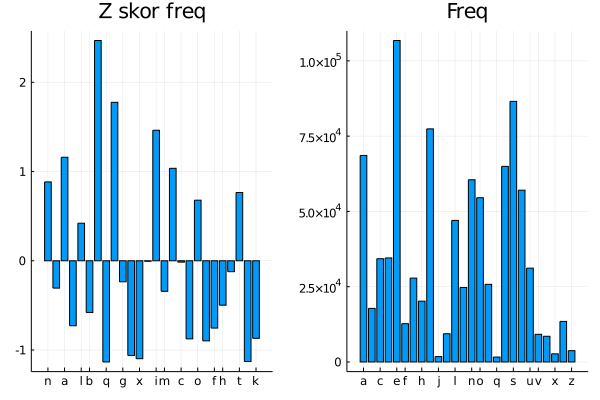

In [145]:
alfabe=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',
    'p','q','r','s','t','u','v','w','x','y','z']
toplam_harf=zeros(Int,26)

dosya = open("../data/words.txt");
kelimeler=readlines(dosya);

for kelime in kelimeler
    toplam_harf+=count.(string.(alfabe),kelime)
end
close(dosya)
z_toplam_harf=(toplam_harf.-mean(toplam_harf))/std(toplam_harf)
sozluk=Dict(zip(z_toplam_harf,alfabe))

[println(k," => ",f) for (f,k) in sozluk ]
p1=bar(
    collect(values(sozluk)),
    collect(keys(sozluk)),
    title="Z skor freq")
p2=bar(alfabe,
    toplam_harf,
    title="Freq")
plot(p1,p2,legend=false)

In [126]:
# Anagram olan kelimeleri bul ve sırala
function sort_collect(s)
    return sort(collect(s))
end
dosya = open("../data/words.txt");
kelimeler=readlines(dosya);
close(dosya)
function anagram_say(str)
    anagrams=Dict{Array{Char}}{Array{String}}()
    for i in str
        sc=sort_collect(i)
        if !(sc in keys(anagrams))
            anagrams[sc]=[]
        else
            push!(anagrams[sc],i)
        end
    end
    for (i,x) in anagrams
        if isempty(x) || length(x)<2
            delete!(anagrams,i)
        end
    end
    sort(collect(values(anagrams)), by=x-> length(x), rev=true)
end
anagram_say(kelimeler)

2362-element Array{Array{String,N} where N,1}:
 ["asper", "pares", "parse", "pears", "prase", "presa", "rapes", "reaps", "spare", "spear"]
 ["alters", "artels", "estral", "laster", "ratels", "salter", "slater", "staler", "stelar", "talers"]
 ["setal", "slate", "stale", "steal", "stela", "taels", "tales", "teals", "tesla"]
 ["crapes", "escarp", "pacers", "parsec", "recaps", "scrape", "secpar", "spacer"]
 ["inerts", "insert", "inters", "niters", "nitres", "sinter", "triens", "trines"]
 ["palets", "pastel", "petals", "plates", "pleats", "septal", "staple"]
 ["nastier", "ratines", "retains", "retinas", "retsina", "stainer", "stearin"]
 ["east", "eats", "etas", "sate", "seat", "seta", "teas"]
 ["acres", "cares", "carse", "escar", "races", "scare", "serac"]
 ["cartes", "caster", "caters", "crates", "reacts", "recast", "traces"]
 ["earls", "lares", "laser", "lears", "rales", "reals", "seral"]
 ["leaps", "pales", "peals", "pleas", "salep", "sepal", "spale"]
 ["piers", "pries", "prise", "ripes"

In [146]:
# KİTAP OKU
function clean_text(s)
    split.(replace.(lowercase.(strip.(readlines(s))),r"[^A-Za-z ]" => ""))
end

function oku(path;ilk=20)
    dosya=open(path,"r")
    satirlar = clean_text(dosya)
    words=Dict{String}{Int64}()
    for (i,l) in enumerate(satirlar)
        if 168<i<14065 && !isempty(l) # skip header and footer
            [!(w in keys(words)) ? words[w]=1 : words[w]+=1 for w in l]
        end
    end
    sort(collect(words), by= x-> last(x),rev=true)[1:ilk]
end
oku("../data/prideandprejudice.txt")

20-element Array{Pair{String,Int64},1}:
  "the" => 4264
   "to" => 4069
   "of" => 3538
  "and" => 3483
  "her" => 2158
    "i" => 2044
    "a" => 1915
   "in" => 1839
  "was" => 1808
  "she" => 1677
 "that" => 1555
   "it" => 1508
  "not" => 1412
  "you" => 1341
   "he" => 1318
  "his" => 1253
   "be" => 1230
  "had" => 1163
   "as" => 1160
 "with" => 1035